In [2]:
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreeRegressor
from sklearn.feature_selection import RFE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 

import plotly
import scipy
from scipy import cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
from matplotlib import cm
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import DBSCAN, KMeans, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from kneed import KneeLocator
import umap

from sklearn.model_selection import train_test_split
from genetic_selection import GeneticSelectionCV
from sklearn.ensemble import RandomForestRegressor
from scipy.cluster import hierarchy

In [13]:
from sklearn.ensemble import BaggingRegressor

In [3]:
num_df = pd.read_excel('D:/Аня учеба/SCAMT/df_norm.xlsx')

In [5]:
# read file
df = pd.read_excel(r'C:\Users\Raven\Desktop\df_norm.xlsx')
df

,Unnamed: 0.1,measurement_error,raw_value,bond_stereo_count,charge,complexity,covalent_unit_count,defined_atom_stereo_count,defined_bond_stereo_count,exact_mass,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,Freq_specifier
0,0,0.0,1.4244,0,0,27.000000,1,0,0,64.012459,...,8.745603,41.377399,197.992935,10.420681,227,10,52,51,2.625000,460
1,1,0.0,1.3890,0,0,139.000000,1,0,0,164.068466,...,4.174387,17.310770,46.041866,5.115763,4,0,6,4,1.000000,460
2,2,0.0,1.4500,0,0,228.000000,1,0,0,197.992935,...,10.523822,77.504051,427.062012,9.490267,2096,44,146,176,6.333333,157
3,3,0.0,2.9000,1,0,744.000000,1,0,0,427.062012,...,4.174387,17.310770,41.026550,6.837758,4,0,6,4,1.000000,10
4,4,0.0,1.3630,1,0,744.000000,1,0,0,427.062012,...,8.124150,33.544697,92.062599,6.137506,42,5,30,31,1.666667,460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,1388,0.0,1.3290,0,0,988.000000,1,0,0,583.373352,...,4.174387,17.310770,59.966755,19.988918,4,0,6,4,1.000000,460
1389,1389,0.1,2.1000,0,-1,0.000000,1,0,0,17.002739,...,8.590258,37.289974,123.032028,8.788002,88,9,40,43,2.111111,157
1390,1390,0.0,1.2140,0,0,149.000000,1,0,0,169.998032,...,0.000000,1.000000,18.010565,6.003521,0,0,0,0,0.000000,460
1391,1391,0.0,1.4516,0,0,0.000000,1,0,0,2.015650,...,7.625107,29.418928,87.993614,17.598722,16,0,20,16,1.000000,10


In [6]:
# to generate new features we selected features from dataset that have physical
# influence on density. we chose 'complexity', 'tpsa', 'exact_mass', 'heavy_atom_count', 'molecular_weight', 'Diameter', 'Radius', 'nHeavyAtom', 'h_bond_acceptor_count', 'h_bond_donor_count', 'nHetero'
# selecting parameters
y = df.loc[:, ['raw_value'
X = df.loc[:, ['complexity', 'tpsa', 'exact_mass', 'heavy_atom_count', 'molecular_weight', 'Diameter', 'Radius', 'nHeavyAtom',
                    'h_bond_acceptor_count', 'h_bond_donor_count', 'nHetero']]
y = df.loc[:, ['raw_value']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=360)

In [7]:
#use AutoFeatRegressor to generate new features
model = AutoFeatRegressor(apply_pi_theorem=True, categorical_cols=None,
                          feateng_cols=None, feateng_steps=2, featsel_runs=3,
                          transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3', '1/'),)
model

AutoFeatRegressor(featsel_runs=3,
                  transformations=('exp', 'log', 'abs', 'sqrt', '^2', '^3',
                                   '1/'))

In [8]:
# function activation
X_train_feature_creation = model.fit_transform(X_train.to_numpy(), y_train.to_numpy().flatten())
X_test_feature_creation = model.transform(X_test.to_numpy())

In [9]:
# dataset w/ new features
X_test_feature_creation.head()

,x000,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010
0,394.000000,122.000000,355.092529,24.0,355.500000,2.0,1.0,3.0,5.0,3.0,3.0
1,0.000000,0.000000,16.031300,1.0,16.042999,3.0,2.0,4.0,0.0,0.0,1.0
2,18.299999,34.099998,59.966755,3.0,60.084000,6.0,3.0,13.0,2.0,0.0,5.0
3,18.299999,34.099998,59.966755,3.0,60.084000,2.0,1.0,3.0,2.0,0.0,3.0
4,18.299999,34.099998,151.892029,3.0,150.710007,2.0,1.0,3.0,2.0,0.0,2.0


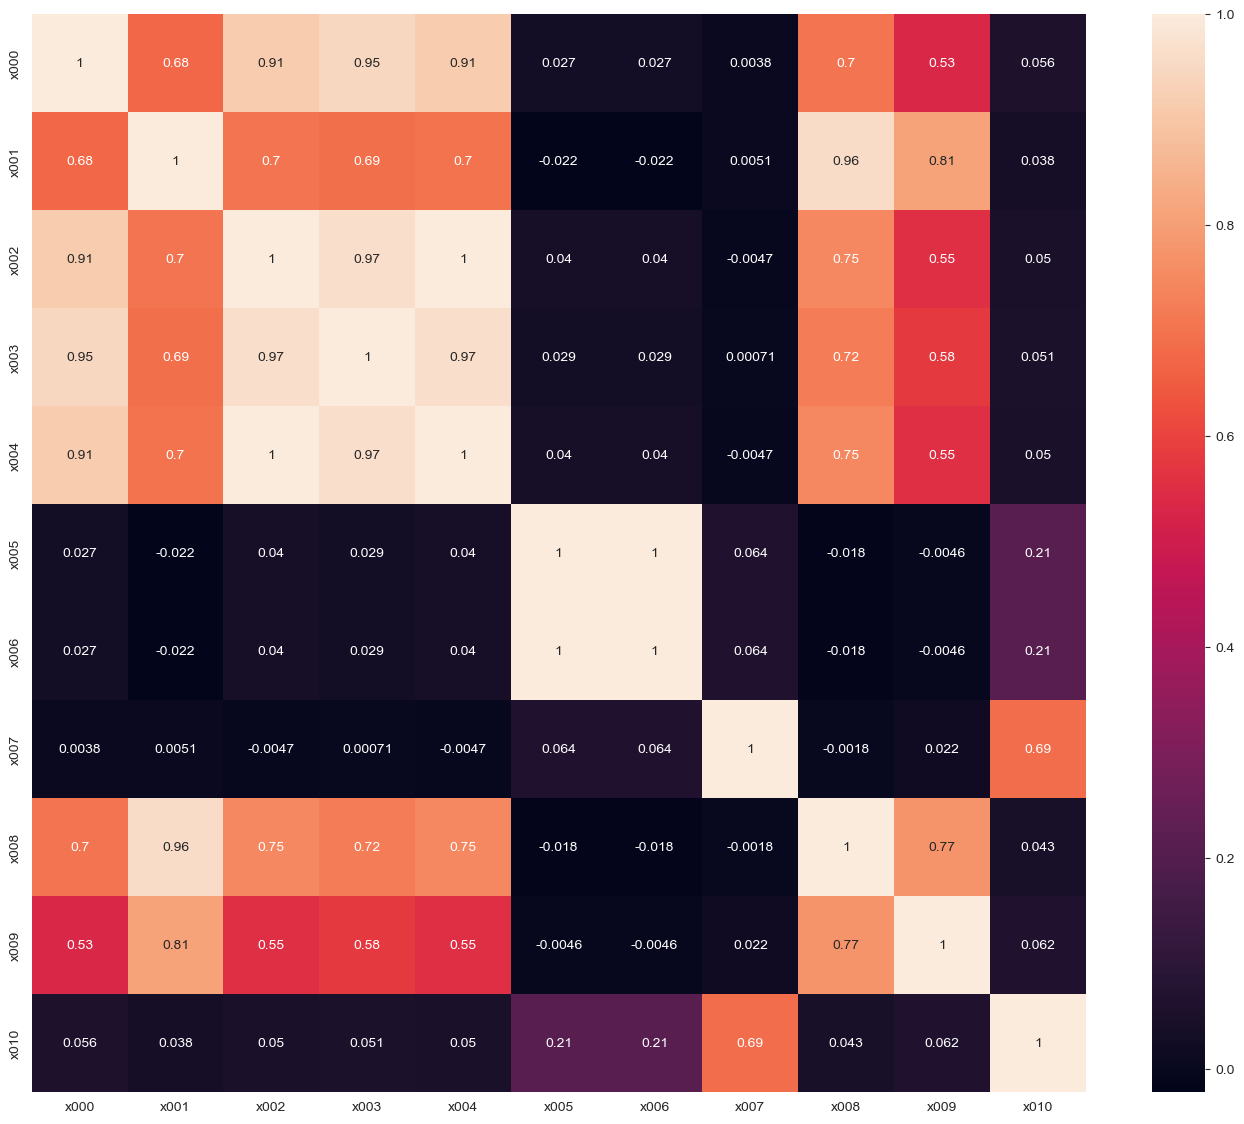

In [11]:
# usage of correlation matrix to make sure that new features don't correlate w/ each other
plt.figure(figsize=(17, 14))
corr = X_train_feature_creation.corr()

# visualization 
plot = sns.heatmap(corr, annot=True)

In [4]:
X_normalized = num_df.drop(['raw_value'], axis=1)
Y_normalized = pd.DataFrame(num_df['raw_value'], columns=['raw_value'])

In [5]:
# initialize learning estimator
estimator = RandomForestRegressor()

# initialize genetic algorithm parameters
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=10,
    n_population=10, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.2,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=20,
    caching=True, n_jobs=-1)

# train genetic algorithm
model = model.fit(X_normalized, Y_normalized)

# print out selected features
print('Features:', (X_normalized.columns[model.support_]))

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features: Index(['NssSiH2'], dtype='object')


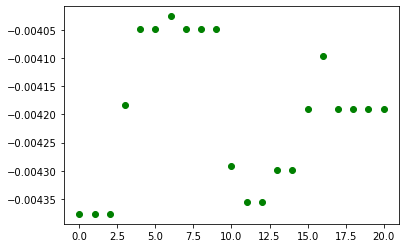

In [6]:
# plot generation scores
plt.plot(model.generation_scores_, 'o', color='green')

since the value is negative, the model shows extremely low reproducibility

since the value is negative, the model shows extremely low reproducibility

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Features: Index(['n9Ring'], dtype='object')


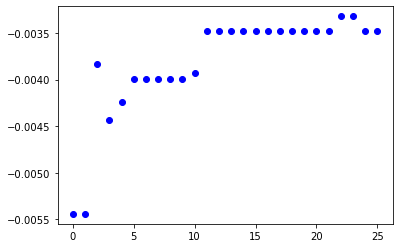

In [14]:
# initialize extra tree regressor
estimator = BaggingRegressor()

# initialize genetic algorithm parameters
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="r2", max_features=10,
    n_population=10, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.2,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=20, 
    caching=True, n_jobs=-1) 
    
# train genetic algorithm 
model = model.fit(X_normalized, Y_normalized) 

 # print out selected features 
print('Features:', (X_normalized.columns[model.support_]))

plt.plot(model.generation_scores_, 'o', color='blue')

all models show low reproductivity

# KMeans

In [7]:
# Fill in the gaps with kNN
#using the kNN method to fill in the missing data
# Data
data = num_df.select_dtypes(include = ['float', 'int'])

# Create a KNNImputer object with the number of nearest neighbors equal to 5
imputer = KNNImputer(n_neighbors=5)

# Fill in the missing values in the dataset
data_imputed = imputer.fit_transform(data)

# Convert a numpy array to a pandas dataframe
data_imputed = pd.DataFrame(data_imputed, columns=data.columns)

data_imputed.shape

# Let's normalize the data
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(data_imputed)
df_norm = pd.DataFrame(df_norm, columns=data_imputed.columns)

#Dimension reduction
# Data
X, y = df_norm.drop(["raw_value"], axis=1), df_norm[["raw_value"]].values.flatten()

# initialize the algorithm of the variety and train on X, y
X_umap = umap.UMAP(n_components=2, min_dist = 0.5, metric = 'euclidean', random_state=989).fit_transform(X)

In [10]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_umap)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [8]:
# Graph of the dependence of the number of clusters on SSE
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_umap)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [9]:
n_clusters=3  #The number of clusters to form as well as the number of centroids to generate
# Application of the model
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_umap)
y_aniso = kmeans.predict(X_umap)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_aniso, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

C:\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

# Birch

In [ ]:
model = Birch(branching_factor = 50, n_clusters = None, threshold = 1.5)
model.fit(X_umap)
pred = model.predict(X_umap)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c = pred)